In [51]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [106]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_final.csv', index_col=0)
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,5864.791484,480,5219.889308,4593.730994,4737.952367,0.075206,0.0,2505.270905,4985.686604,5358.364787,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
1,5864.791484,18300,11252.430270,12166.479530,4737.952367,1.063492,-1.0,6122.293626,8621.426035,9007.739139,2273.463724,6873.875154,5919.184856,5862.136698,0.0,1.0
2,5864.791484,9800,13332.624775,4593.730994,10663.846715,0.650794,-1.0,6092.941274,8621.426035,11071.351592,3263.878161,6873.875154,5919.184856,5862.136698,0.0,1.0
3,5864.791484,1500,2828.211457,4593.730994,4737.952367,-0.730159,0.0,6281.659842,4985.686604,5358.364787,7063.780127,4617.801420,5919.184856,5862.136698,0.0,1.0
4,5864.791484,3600,2828.211457,4593.730994,4737.952367,-0.825397,-2.4,6721.586025,8621.426035,6508.064481,7063.780127,6873.875154,5919.184856,5862.136698,0.0,1.0


In [54]:
columnas_eliminar = ['abtest_control', 'abtest_test' ,'month_created', 'year_created', 'lastSeen', 'monthOfRegistration', 'dateCrawled']

In [55]:
df.drop(columns=columnas_eliminar, inplace=True)

In [56]:
x= df.drop(columns='price')
y = df[['price']]

In [57]:
y.describe()

,price
count,356209.000000
mean,5919.659879
std,8292.917940
min,1.000000
25%,1299.000000
50%,3150.000000
75%,7500.000000
max,199900.000000


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [59]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [60]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[41781.67329034],
       [ 9099.78550425],
       [ 1736.64471532]])

In [61]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[ 8196.03442395],
       [ 9452.86998455],
       [-4131.01296534]])

In [62]:
metricas = {
'train': {
    'r2_score': r2_score(y_train, y_train_pred),
    'MAE': mean_absolute_error(y_train, y_train_pred),
    'MSE': mean_squared_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
},
'test': {
    'r2_score': r2_score(y_test, y_test_pred),
    'MAE': mean_absolute_error(y_test, y_test_pred),
    'MSE': mean_squared_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

}
}

pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.571308,3146.743012,2.949575e+07,5430.998842
test,0.568125,3141.092076,2.964610e+07,5444.823110


In [63]:
# Convertir a arrays planos si son multidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

Text(0, 0.5, 'Predicciones (y_test_pred)')

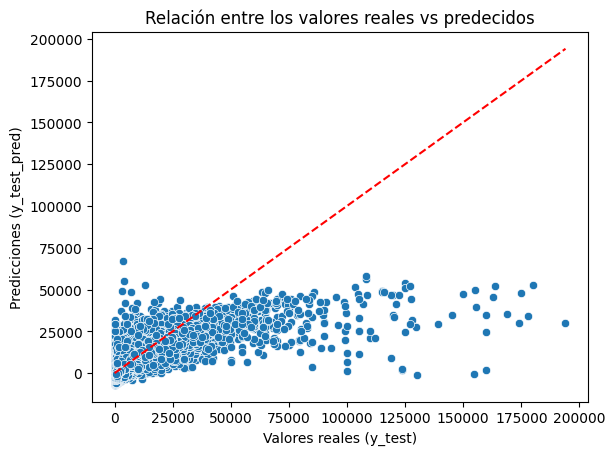

In [64]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

In [65]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

## K Fold

In [66]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_r2 = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="r2")

score_r2 # me quedo con la media de mis r2
np.mean(score_r2)

0.5707563408163704

In [67]:
kf = KFold(n_splits=5, #entre 5 y 10
           shuffle=True, # puede repetir cajas
           random_state=42)

score_mse = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="neg_mean_squared_error")

score_mse # me quedo con la media de mis r2
abs(np.mean(score_mse))

29532130.4106161

In [68]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_rmse = cross_val_score(modelo_lineal, 
                           x, 
                          y, 
                           cv = kf, 
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse))

5432.770348102209

## Decision Tree

In [69]:
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

In [70]:
params_arbol_2 = {
    'max_depth': [6, 8, 9, 10],
    'min_samples_split': [8, 9, 11, 13,],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [25, 30, 35, 40, 45]
}

In [71]:
params_arbol_3 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [7, 10, 12, 15],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [20,30,40,50]
}

In [72]:
params_arbol_4 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [9,12,14, 15],
    'min_samples_leaf': [70, 100, 130, 150],
    'max_leaf_nodes': [35,45,50,55]
}

In [ ]:
params_arbol_5 = {
    'max_depth': [8,10,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [55,70,90,100]
}

In [74]:
params_arbol_7 = {
    'max_depth': [3,7,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [35,70,105,140]
}

In [75]:
params_arbol_6 = {
    'max_depth': [9, 9.5,11,17],
    'min_samples_split': [6,9,14,16],
    'min_samples_leaf': [20, 30, 40, 50],
    'max_leaf_nodes': [90,100,110,130]
}

In [ ]:
params_arbol_8 = {
    'max_depth': [8,10,12,15],
    'min_samples_split': [4,6,8,10],
    'min_samples_leaf': [25, 35, 60,80],
    'max_leaf_nodes': [55,70,90,100]
}

In [ ]:
params_arbol_9 = {
    'max_depth': [8,10,12,15],
    'min_samples_split': [4,6,8,10],
    'min_samples_leaf': [25, 35, 60,80],
    'max_leaf_nodes': [55,70,90,100]
}

PAMS 8

In [105]:
grid_search_arbol_8 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_8,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_8.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 15],
                         'max_leaf_nodes': [55, 70, 90, 100],
                         'min_samples_leaf': [25, 35, 60, 80],
                         'min_samples_split': [4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [119]:
modelo_final_arbol_8 = grid_search_arbol_8.best_estimator_

In [120]:
y_test_pred_final_8 = modelo_final_arbol_8.predict(x_test)
y_train_pred_final_8 = modelo_final_arbol_8.predict(x_train)

In [121]:
df_metricas_arbol_8 = metricas(y_train, y_train_pred_final_8, y_test, y_test_pred_final_8)

In [123]:
df_metricas_arbol_8['Modelo'] = 'DT Params 8'

In [124]:
df_metricas_arbol_8

,r2_score,MAE,MSE,RMSE,Modelo
train,0.689995,2454.251813,2.132964e+07,4618.402425,DT Params 8
test,0.674197,2461.076016,2.236474e+07,4729.136929,DT Params 8


PAMS 7

In [76]:
grid_search_arbol_7 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_7,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_7.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 12, 15],
                         'max_leaf_nodes': [35, 70, 105, 140],
                         'min_samples_leaf': [50, 95, 100, 150],
                         'min_samples_split': [9, 12, 15, 18]},
             scoring='neg_mean_squared_error')

In [77]:
modelo_final_arbol_7 = grid_search_arbol_7.best_estimator_

In [78]:
y_test_pred_final_7 = modelo_final_arbol_7.predict(x_test)
y_train_pred_final_7 = modelo_final_arbol_7.predict(x_train)

In [79]:
df_metricas_arbol_7 = metricas(y_train, y_train_pred_final_7, y_test, y_test_pred_final_7)

In [80]:
df_metricas_arbol_7

,r2_score,MAE,MSE,RMSE
train,0.698901,2368.639984,2.071682e+07,4551.573139
test,0.679230,2385.349323,2.201928e+07,4692.470502


In [117]:
df_metricas_arbol_7['Modelo'] = 'DT Params 7'

In [118]:
df_metricas_arbol_7

,r2_score,MAE,MSE,RMSE,Modelo
train,0.698901,2368.639984,2.071682e+07,4551.573139,DT Params 7
test,0.679230,2385.349323,2.201928e+07,4692.470502,DT Params 7


PAMS 4

In [81]:
grid_search_arbol_4 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_4,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [35, 45, 50, 55],
                         'min_samples_leaf': [70, 100, 130, 150],
                         'min_samples_split': [9, 12, 14, 15]},
             scoring='neg_mean_squared_error')

In [83]:
modelo_final_arbol_4 = grid_search_arbol_4.best_estimator_

In [84]:
y_test_pred_final_4 = modelo_final_arbol_4.predict(x_test)
y_train_pred_final_4 = modelo_final_arbol_4.predict(x_train)

In [85]:
df_metricas_arbol_4 = metricas(y_train, y_train_pred_final_4, y_test, y_test_pred_final_4)

In [86]:
df_metricas_arbol_4

,r2_score,MAE,MSE,RMSE
train,0.656142,2578.264493,2.365887e+07,4864.038833
test,0.640148,2589.365833,2.470206e+07,4970.116863


PAMS 5

In [87]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 15],
                         'max_leaf_nodes': [55, 70, 90, 100],
                         'min_samples_leaf': [50, 95, 100, 150],
                         'min_samples_split': [9, 12, 15, 18]},
             scoring='neg_mean_squared_error')

In [88]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [89]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [90]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [91]:
df_metricas_arbol_5

,r2_score,MAE,MSE,RMSE
train,0.685959,2439.132421,2.160731e+07,4648.366165
test,0.669265,2448.081437,2.270332e+07,4764.799899


Utilizando mis métricas para los parámetros 5, los valores anteriores son los mejores hasta ahora.

## Opciones de visualización para mejorar

In [92]:
# plot_tree(decision_tree=modelo_final_arbol_4,
#             feature_names=x.columns,
#             filled=True
#                         )

In [93]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_4.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
242,1.357329,0.250726,0.022646,0.008944,10,55,70,14,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.343067e+07,-2.687243e+07,-2.258477e+07,-2.336866e+07,-2.498068e+07,-2.424744e+07,1.525257e+06,1
243,1.423104,0.236426,0.021527,0.004653,10,55,70,15,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.343067e+07,-2.687243e+07,-2.258477e+07,-2.336866e+07,-2.498068e+07,-2.424744e+07,1.525257e+06,1
241,1.599968,0.290990,0.029699,0.017384,10,55,70,12,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.343067e+07,-2.687243e+07,-2.258477e+07,-2.336866e+07,-2.498068e+07,-2.424744e+07,1.525257e+06,1
240,1.386267,0.234214,0.020870,0.003689,10,55,70,9,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.343067e+07,-2.687243e+07,-2.258477e+07,-2.336866e+07,-2.498068e+07,-2.424744e+07,1.525257e+06,1
176,1.151666,0.084363,0.018763,0.001253,7,55,70,9,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.332369e+07,-2.685059e+07,-2.255777e+07,-2.337982e+07,-2.516425e+07,-2.425522e+07,1.554200e+06,5
179,1.227221,0.127528,0.025071,0.012299,7,55,70,15,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.332369e+07,-2.685059e+07,-2.255777e+07,-2.337982e+07,-2.516425e+07,-2.425522e+07,1.554200e+06,5
178,1.157907,0.089599,0.017957,0.001324,7,55,70,14,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.332369e+07,-2.685059e+07,-2.255777e+07,-2.337982e+07,-2.516425e+07,-2.425522e+07,1.554200e+06,5
177,1.209964,0.054218,0.018630,0.003340,7,55,70,12,"{'max_depth': 7, 'max_leaf_nodes': 55, 'min_sa...",-2.332369e+07,-2.685059e+07,-2.255777e+07,-2.337982e+07,-2.516425e+07,-2.425522e+07,1.554200e+06,5
247,1.402816,0.350612,0.021226,0.008467,10,55,100,15,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.343905e+07,-2.723846e+07,-2.258844e+07,-2.307552e+07,-2.519368e+07,-2.430703e+07,1.708975e+06,9
246,1.254527,0.210219,0.020864,0.008423,10,55,100,14,"{'max_depth': 10, 'max_leaf_nodes': 55, 'min_s...",-2.343905e+07,-2.723846e+07,-2.258844e+07,-2.307552e+07,-2.519368e+07,-2.430703e+07,1.708975e+06,9


In [94]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
242,10,55,70,14,-2.424744e+07
243,10,55,70,15,-2.424744e+07
241,10,55,70,12,-2.424744e+07
240,10,55,70,9,-2.424744e+07
176,7,55,70,9,-2.425522e+07
...,...,...,...,...,...
36,3,50,100,9,-3.574468e+07
35,3,50,70,15,-3.574468e+07
34,3,50,70,14,-3.574468e+07
32,3,50,70,9,-3.574468e+07


In [95]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [96]:
df_rmse_prof

,param_max_depth,MSE
0,3,5978.685333
1,5,5194.399834
2,7,5004.802451
3,10,5004.888394


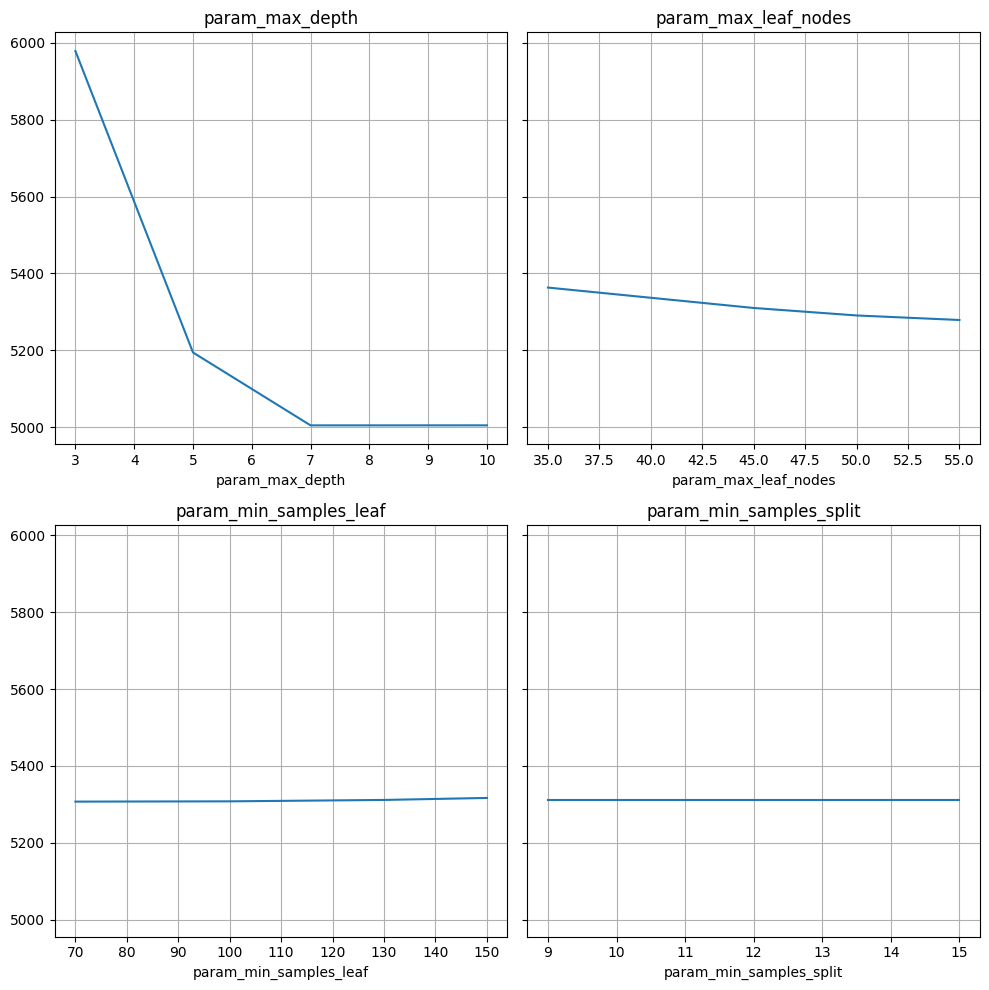

In [97]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 



In [101]:
df_importancia = pd.DataFrame(modelo_final_arbol_4.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

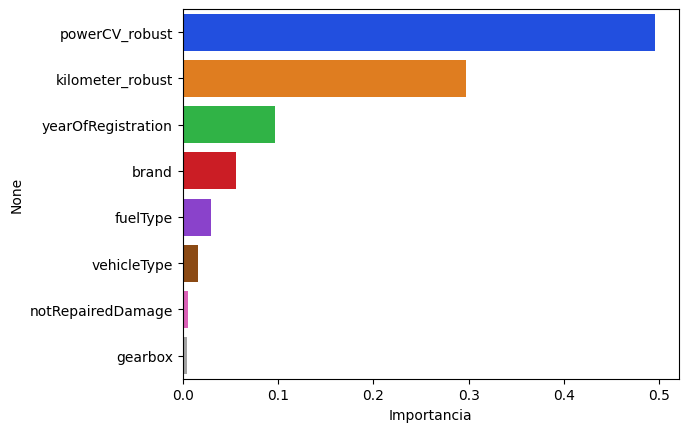

In [102]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

# Ensamble

## Random Forest

In [112]:
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': [2,4,6,8],
    'max_depth': [10],
    'min_samples_split': [9],
    'min_samples_leaf': [100], 
    'max_leaf_nodes': [55]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [113]:
modelo_final_rf

RandomForestRegressor(max_depth=10, max_features=4, max_leaf_nodes=55,
                      min_samples_leaf=100, min_samples_split=9,
                      n_estimators=150, random_state=42)

In [114]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)

In [115]:
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.691663,2407.488506,2.121482e+07,4605.954992
test,0.678325,2421.148317,2.208138e+07,4699.083232


## Gradient Booster

In [ ]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [140, 150, 160,170],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [10],
    'min_samples_split': [9],
    'min_samples_leaf': [55], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [ ]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb